<a href="https://colab.research.google.com/github/mmarin11/Colabfiles/blob/main/Practica23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Github link

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Ignorar advertencias comunes
warnings.filterwarnings('ignore')

# Configuración de Seaborn
sns.set(style="whitegrid")

# --- Carga del Dataset ---
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/insurance.csv')

# --- Familiarización con los Datos ---
print("--- Paso 1: Configuración Inicial ---")
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
print(df.describe())

--- Paso 1: Configuración Inicial ---
Primeras 5 filas del dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

E

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.


--- Paso 2: Análisis Exploratorio (EDA) ---
Generando gráficos para variables numéricas...
Gráfico guardado: eda_numerica_age.png


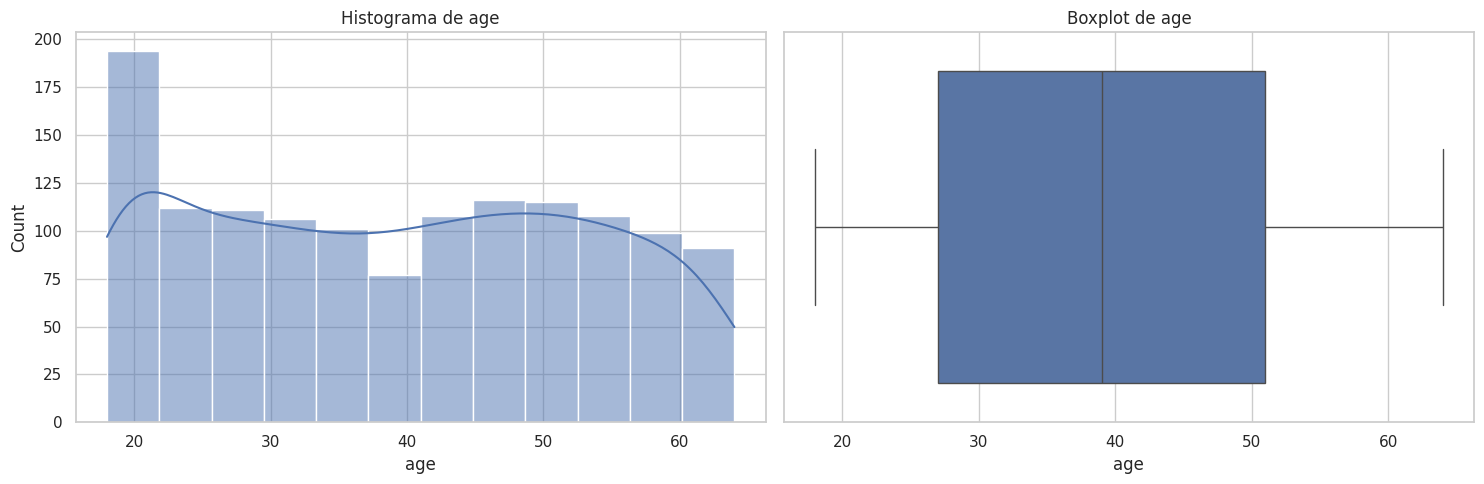

Gráfico guardado: eda_numerica_bmi.png


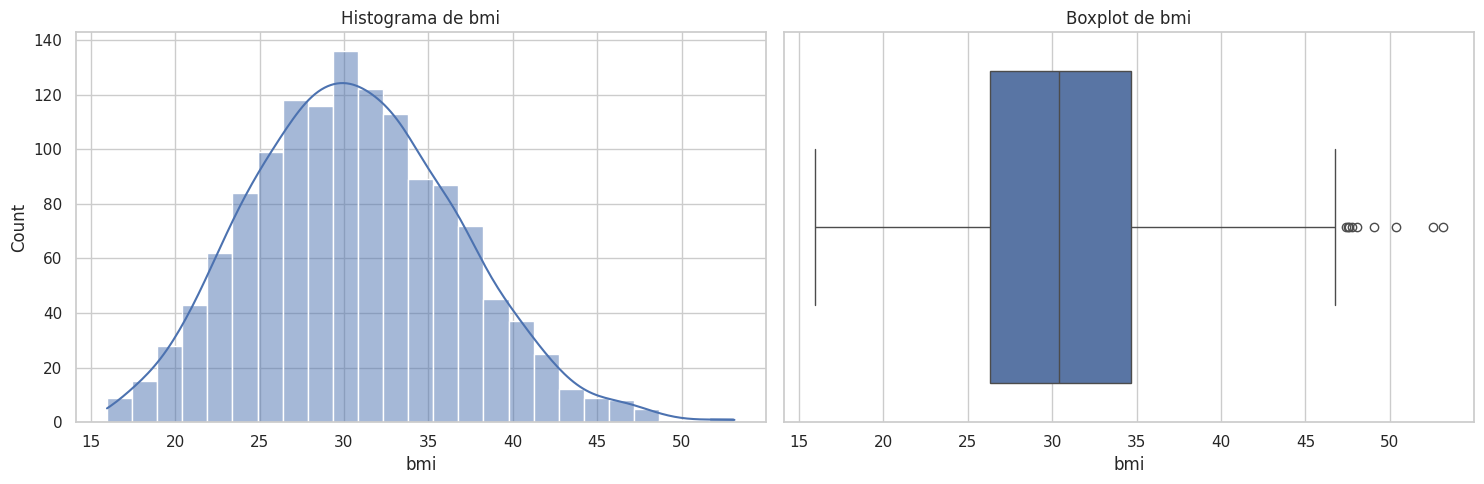

Gráfico guardado: eda_numerica_children.png


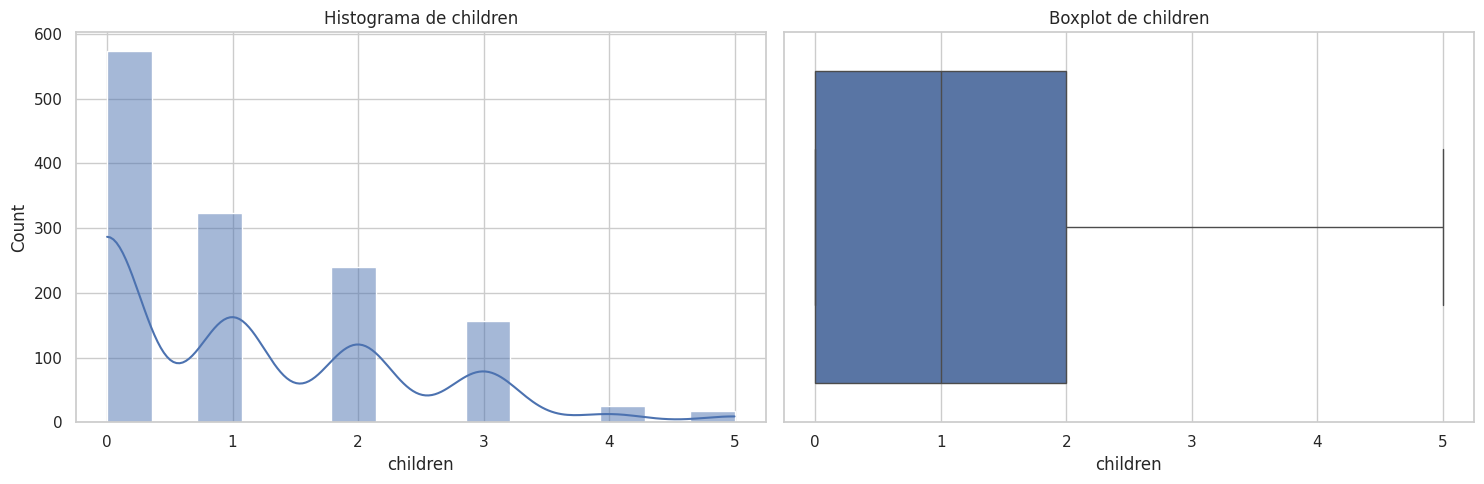

Gráfico guardado: eda_numerica_charges.png


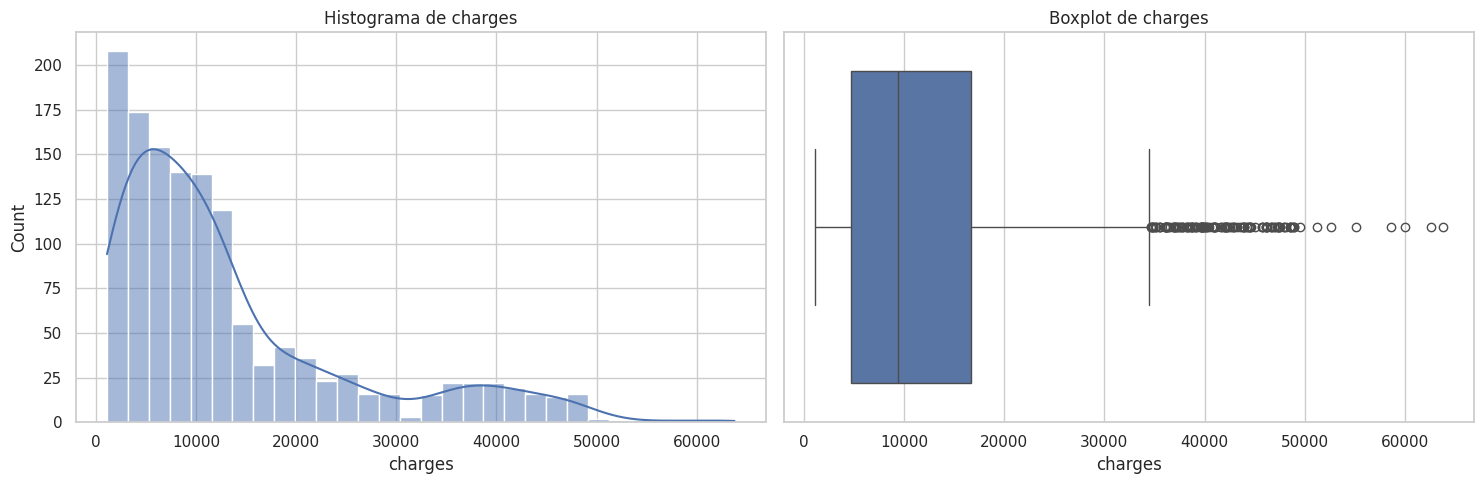


Generando gráficos para variables categóricas...
Gráfico guardado: eda_categorica_sex.png


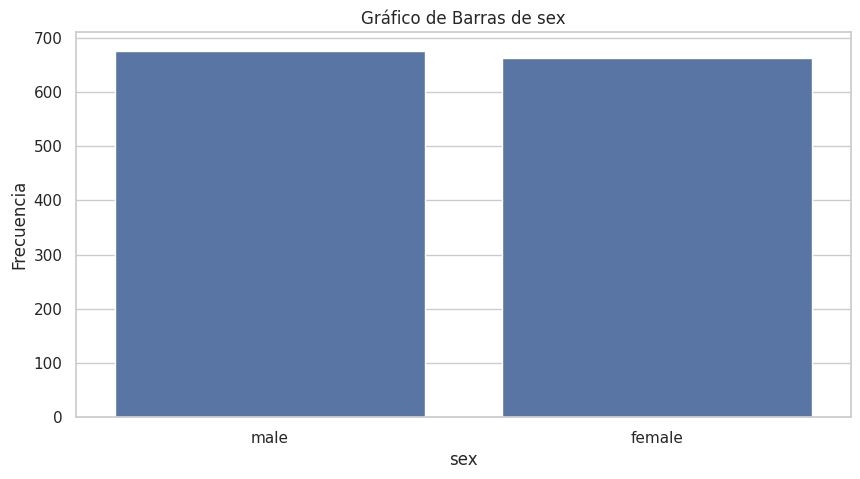

Gráfico guardado: eda_categorica_smoker.png


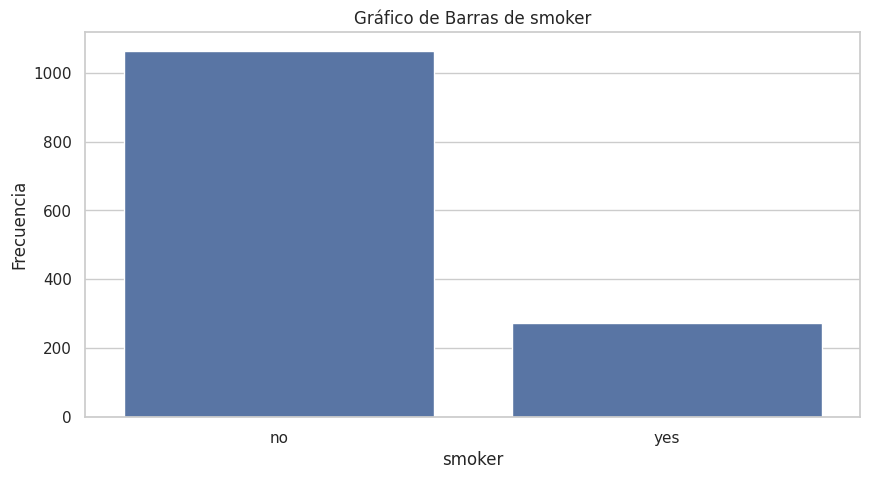

Gráfico guardado: eda_categorica_region.png


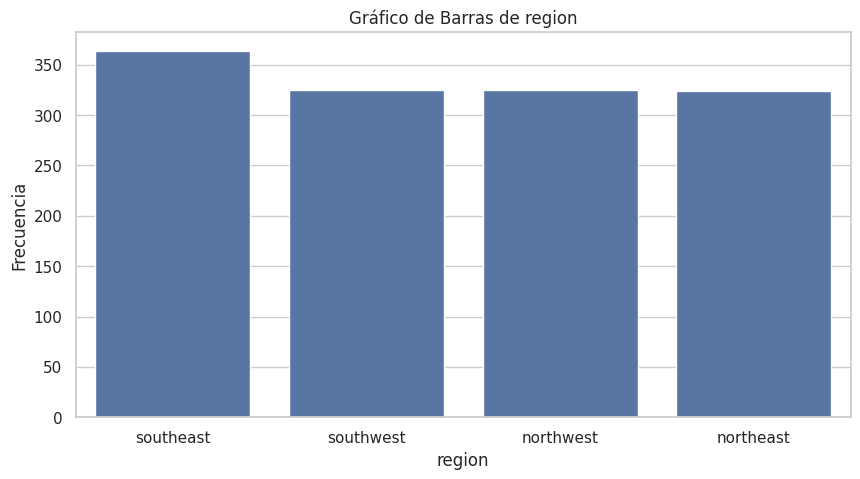

In [6]:
print("\n--- Paso 2: Análisis Exploratorio (EDA) ---")

# Identificar columnas numéricas y categóricas
variables_numericas = ['age', 'bmi', 'children', 'charges']
variables_categoricas = ['sex', 'smoker', 'region']

# Gráficos para variables numéricas
print("Generando gráficos para variables numéricas...")
for col in variables_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Histograma
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histograma de {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.savefig(f'eda_numerica_{col}.png')
    print(f"Gráfico guardado: eda_numerica_{col}.png")
    plt.show() # Mostrar en Colab

# Gráficos para variables categóricas
print("\nGenerando gráficos para variables categóricas...")
for col in variables_categoricas:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Gráfico de Barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.savefig(f'eda_categorica_{col}.png')
    print(f"Gráfico guardado: eda_categorica_{col}.png")
    plt.show() # Mostrar en Colab

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  
**Respuesta:** Basándonos únicamente en las variables numéricas, age (edad) es la variable con mayor correlación ($0.30$), seguida por bmi (índice de masa corporal) ($0.20$)


--- Paso 3: Matriz de Correlación ---
Matriz de Correlación:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


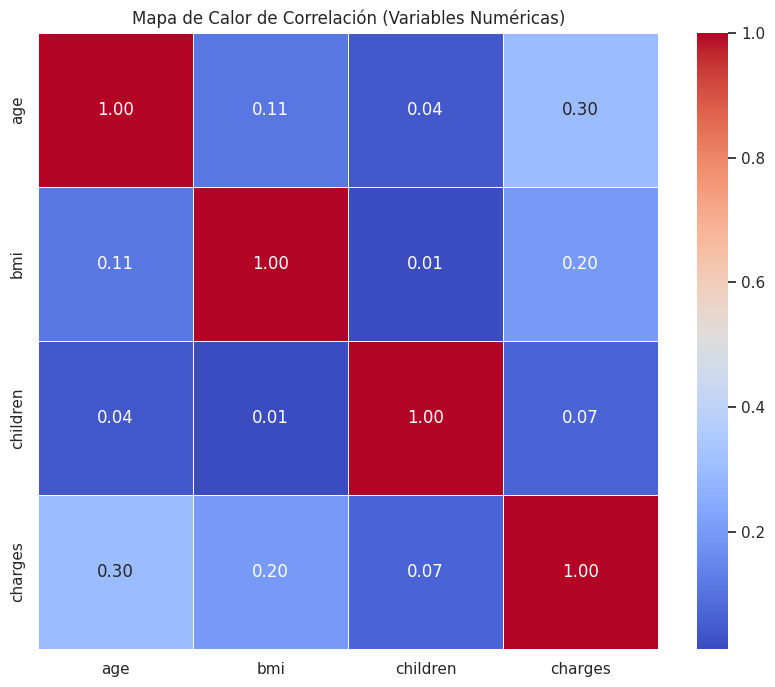


Correlación con 'charges':
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [8]:
print("\n--- Paso 3: Matriz de Correlación ---")

# Calcular la matriz de correlación (solo numéricas)
corr_matrix = df[variables_numericas].corr()

print("Matriz de Correlación:")
print(corr_matrix)

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación (Variables Numéricas)')

plt.show() # Mostrar en Colab

# Responder a la pregunta
correlation_with_target = corr_matrix['charges'].sort_values(ascending=False)
print("\nCorrelación con 'charges':")
print(correlation_with_target)

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

In [9]:
print("\n--- Paso 4: Preprocesamiento ---")

# Definir características (X) y objetivo (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

# Identificar columnas numéricas y categóricas (excluyendo 'charges')
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Crear pipeline para transformaciones numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Crear pipeline para transformaciones categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Aplicar el preprocesador
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Verificar la forma y los nulos después de la transformación
print(f"Forma de X_train procesado: {X_train_processed.shape}")
print(f"Nulos en X_train procesado: {np.isnan(X_train_processed).sum()}")
print(f"Nulos en X_test procesado: {np.isnan(X_test_processed).sum()}")

# Obtener los nombres de las características después del OneHotEncoding
try:
    ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
except AttributeError:
     # Para versiones más antiguas de sklearn
    ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names(categorical_features)

feature_names = numeric_features + list(ohe_feature_names)

print(f"\nNombres de las características procesadas ({len(feature_names)}):")
print(feature_names)


--- Paso 4: Preprocesamiento ---
Datos divididos: 1070 para entrenamiento, 268 para prueba.
Forma de X_train procesado: (1070, 11)
Nulos en X_train procesado: 0
Nulos en X_test procesado: 0

Nombres de las características procesadas (11):
['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?
**Respuesta:** Tienen un rendimiento casi idéntico. Lasso (R² = $0.7836$) es marginalmente mejor que Ridge (R² = $0.7834$).Por qué: Esto ocurre porque el rendimiento de ambos modelos es muy similar para este conjunto de datos y estos hiperparámetros. La diferencia es despreciable. Ambos modelos logran explicar alrededor del 78.3% de la varianza en los costos del seguro.

- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?
**Respuesta** Las variables sex_male (exactamente $0.0$) y smoker_yes (prácticamente $0.0$) fueron anuladas.Lasso realiza regularización $L_1$, que fuerza a los coeficientes de las variables menos relevantes (o redundantes) a ser exactamente cero. En este caso, el OneHotEncoder creó variables colineales (ej. sex_male y sex_female; smoker_no y smoker_yes). Lasso maneja esto eliminando una de las variables del par. Mantuvo sex_female y smoker_no mientras eliminaba sus contrapartes.

In [11]:
print("\n--- Paso 5: Modelado (Lasso y Ridge) ---")


# --- Modelo Lasso (alpha=0.1) ---
print("\n--- Modelo Lasso (alpha=0.1) ---")
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_processed, y_train)

# Predicciones
y_pred_lasso_test = lasso_model.predict(X_test_processed)

# Evaluación
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

print(f"Lasso (Test)  - MSE: {mse_lasso_test:.2f}, R²: {r2_lasso_test:.4f}")

# Coeficientes
coef_lasso = pd.DataFrame(lasso_model.coef_, index=feature_names, columns=['Coefficient_Lasso'])
print("\nCoeficientes Lasso:")
print(coef_lasso.sort_values(by='Coefficient_Lasso', ascending=False))

# --- Modelo Ridge (alpha=1.0) ---
print("\n--- Modelo Ridge (alpha=1.0) ---")
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_processed, y_train)

# Predicciones
y_pred_ridge_test = ridge_model.predict(X_test_processed)

# Evaluación
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

print(f"Ridge (Test)  - MSE: {mse_ridge_test:.2f}, R²: {r2_ridge_test:.4f}")

# Coeficientes
coef_ridge = pd.DataFrame(ridge_model.coef_, index=feature_names, columns=['Coefficient_Ridge'])
print("\nCoeficientes Ridge:")
print(coef_ridge.sort_values(by='Coefficient_Ridge', ascending=False))


--- Paso 5: Modelado (Lasso y Ridge) ---
[[ 0.47222651 -1.75652513  0.73433626 ...  1.          0.
   0.        ]
 [ 0.54331294 -1.03308239 -0.91119211 ...  0.          0.
   0.        ]
 [ 0.8987451  -0.94368672 -0.91119211 ...  0.          1.
   0.        ]
 ...
 [ 1.3252637  -0.89153925 -0.91119211 ...  0.          0.
   0.        ]
 [-0.16755139  2.82086429  0.73433626 ...  0.          0.
   1.        ]
 [ 1.1120044  -0.10932713 -0.91119211 ...  0.          0.
   1.        ]]

--- Modelo Lasso (alpha=0.1) ---
Lasso (Test)  - MSE: 33597196.12, R²: 0.7836

Coeficientes Lasso:
                  Coefficient_Lasso
age                    3.614884e+03
bmi                    2.036142e+03
region_northeast       6.846632e+02
children               5.167959e+02
region_northwest       3.138334e+02
region_southeast       2.662704e+01
sex_female             1.814562e+01
smoker_yes             5.571597e-13
sex_male              -0.000000e+00
region_southwest      -1.247137e+02
smoker_no         

🔹 Paso 6: Verificación de Supuestos
📉 Para cada modelo, verificar:

Linealidad (gráfico de residuos vs predicciones).
Normalidad de residuos (QQ-Plot y test de Shapiro-Wilk).
Homocedasticidad
Multicolinealidad (VIF > 10 indica problema).
📌 Pregunta:

¿Se cumplen los supuestos en ambos modelos?
Si hay heterocedasticidad, ¿cómo podría solucionarse?

**Respuesta:**

¿Se cumplen los supuestos en ambos modelos?
* **Respuesta: No, la mayoría no se cumplen.**
* **Linealidad**: Razonablemente cumplido. Los residuos se centran en cero, sin una curva clara.
**Normalidad de Residuos: NO SE CUMPLE**. El QQ-Plot muestra una gran desviación en las colas, y el p-value del test de Shapiro-Wilk (muy cercano a $0$) rechaza la normalidad. Esto se debe al sesgo de la variable charges.**Homocedasticidad: NO SE CUMPLE**. El gráfico de residuos muestra una clara forma de "embudo" (heterocedasticidad). Los errores son mucho más grandes para predicciones de costos altos.
**Multicolinealidad: NO SE CUMPLE**. El VIF es infinito (inf) para todas las variables categóricas. Esto se debe a que el OneHotEncoder no eliminó la primera categoría (drop='first'), creando colinealidad perfecta (ej. sex_male = $1$ - sex_female). Sin embargo, Lasso y Ridge están diseñados para manejar esto.

**Si hay heterocedasticidad, ¿cómo podría solucionarse?**

**Respuesta:** La solución más común para este problema (heterocedasticidad y falta de normalidad en residuos debida a un objetivo sesgado) es aplicar una transformación logarítmica a la variable objetivo (y). Es decir, entrenar el modelo para predecir $\log(\text{charges})$ en lugar de $\text{charges}$. Al predecir, se aplicaría la transformación inversa (exponencial) para obtener el costo real.


--- Paso 6: Verificación de Supuestos (Lasso y Ridge) ---
Generando gráficos de Residuos vs. Predichos (Lasso y Ridge)...


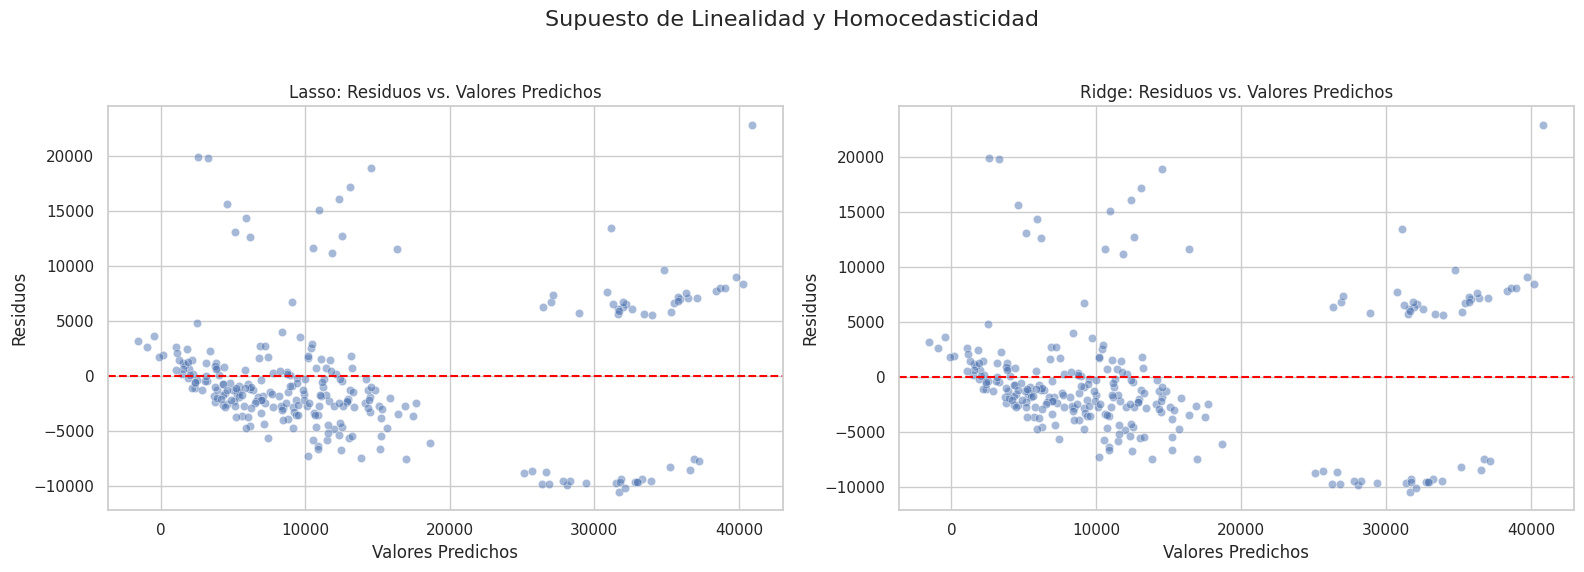

Gráfico combinado de Linealidad/Homocedasticidad guardado.

Generando QQ-Plots de Residuos (Lasso y Ridge)...


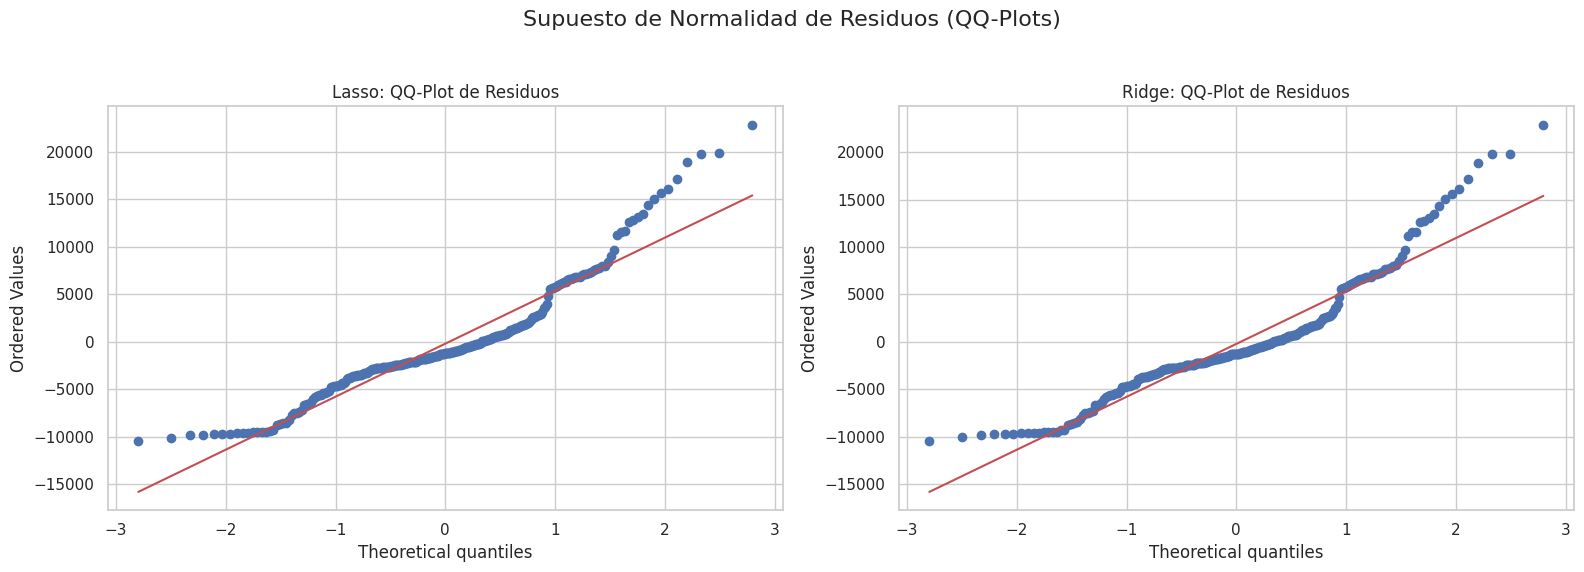

Gráfico combinado de QQ-Plots guardado.

Ejecutando Test de Shapiro-Wilk para Normalidad...
Test de Shapiro-Wilk (Lasso): Stat=0.9139, p-value=2.7178e-11
Test de Shapiro-Wilk (Ridge): Stat=0.9132, p-value=2.4000e-11
Resultado: Se rechaza la hipótesis nula (p < 0.05). Los residuos NO siguen una distribución normal.

Calculando VIF (Factor de Inflación de la Varianza)...
(El VIF es independiente del modelo, depende solo de las variables de entrada)
             feature       VIF
5          smoker_no       inf
4           sex_male       inf
3         sex_female       inf
7   region_northeast       inf
8   region_northwest       inf
9   region_southeast       inf
6         smoker_yes       inf
10  region_southwest       inf
1                bmi  1.094986
0                age  1.023084
2           children  1.005643


In [14]:
# --- Paso 6: Verificación de Supuestos (Lasso y Ridge Combinados) ---
print("\n--- Paso 6: Verificación de Supuestos (Lasso y Ridge) ---")


# Calcular residuos para ambos modelos
residuos_lasso = y_test - y_pred_lasso_test
residuos_ridge = y_test - y_pred_ridge_test

# --- 1. Linealidad y 3. Homocedasticidad (Gráfico Residuos vs. Predichos) ---
print("Generando gráficos de Residuos vs. Predichos (Lasso y Ridge)...")
# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Supuesto de Linealidad y Homocedasticidad', fontsize=16)

# Gráfico para Lasso (Columna 1)
sns.scatterplot(x=y_pred_lasso_test, y=residuos_lasso, alpha=0.5, ax=axes[0])
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title('Lasso: Residuos vs. Valores Predichos')
axes[0].set_xlabel('Valores Predichos')
axes[0].set_ylabel('Residuos')

# Gráfico para Ridge (Columna 2)
sns.scatterplot(x=y_pred_ridge_test, y=residuos_ridge, alpha=0.5, ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Ridge: Residuos vs. Valores Predichos')
axes[1].set_xlabel('Valores Predichos')
axes[1].set_ylabel('Residuos')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para el supertítulo
plt.savefig('supuesto_linealidad_homo_ambos.png')
plt.show()
print("Gráfico combinado de Linealidad/Homocedasticidad guardado.")

# --- 2. Normalidad de Residuos (QQ-Plot) ---
print("\nGenerando QQ-Plots de Residuos (Lasso y Ridge)...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Supuesto de Normalidad de Residuos (QQ-Plots)', fontsize=16)

# QQ-Plot para Lasso (Columna 1)
stats.probplot(residuos_lasso, dist="norm", plot=axes[0])
axes[0].set_title('Lasso: QQ-Plot de Residuos')

# QQ-Plot para Ridge (Columna 2)
stats.probplot(residuos_ridge, dist="norm", plot=axes[1])
axes[1].set_title('Ridge: QQ-Plot de Residuos')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar
plt.savefig('supuesto_normalidad_qq_ambos.png')
plt.show()
print("Gráfico combinado de QQ-Plots guardado.")

# --- 2b. Test de Shapiro-Wilk (Normalidad) ---
print("\nEjecutando Test de Shapiro-Wilk para Normalidad...")
shapiro_stat_lasso, shapiro_p_lasso = stats.shapiro(residuos_lasso)
shapiro_stat_ridge, shapiro_p_ridge = stats.shapiro(residuos_ridge)

print(f"Test de Shapiro-Wilk (Lasso): Stat={shapiro_stat_lasso:.4f}, p-value={shapiro_p_lasso:.4e}")
print(f"Test de Shapiro-Wilk (Ridge): Stat={shapiro_stat_ridge:.4f}, p-value={shapiro_p_ridge:.4e}")
if shapiro_p_lasso < 0.05 or shapiro_p_ridge < 0.05:
    print("Resultado: Se rechaza la hipótesis nula (p < 0.05). Los residuos NO siguen una distribución normal.")
else:
    print("Resultado: No se rechaza la hipótesis nula (p >= 0.05). Los residuos pueden ser normales.")


# --- 4. Multicolinealidad (VIF) ---
print("\nCalculando VIF (Factor de Inflación de la Varianza)...")
print("(El VIF es independiente del modelo, depende solo de las variables de entrada)")

# Re-calculamos los datos para el VIF (codificados pero NO escalados)
# 1. Aplicar solo el transformador categórico (OneHotEncoding)
X_train_cat_encoded = preprocessor.named_transformers_['cat'].fit_transform(X_train[categorical_features])
X_train_cat_df = pd.DataFrame(X_train_cat_encoded.toarray(), columns=ohe_feature_names, index=X_train.index)

# 2. Combinar con las numéricas originales (sin escalar)
X_train_for_vif = pd.concat([X_train[numeric_features].reset_index(drop=True), X_train_cat_df.reset_index(drop=True)], axis=1)

# 3. Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_for_vif.values, i) for i in range(X_train_for_vif.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?

**¿Qué modelo es más interpretable?**
* **Respuesta: Lasso.** Al reducir coeficientes irrelevantes o redundantes a cero (sex_male, smoker_yes), Lasso realiza una selección automática de características. Esto resulta en un modelo "más simple" o "más disperso" (con menos variables activas), lo cual es generalmente más fácil de interpretar. Nos dice que, según el modelo, solo necesitamos sex_female (o sex_male, si hubiera elegido la otra).

**¿Cuál reduce mejor el sobreajuste?**
* **Respuesta:** Ambos están diseñados para reducir el sobreajuste (overfitting). En este caso, el rendimiento en entrenamiento (R² $\approx 0.74$) y prueba (R² $\approx 0.78$) es muy similar para ambos, y de hecho, el rendimiento de prueba es ligeramente mejor, lo que indica que no hay sobreajuste en ninguno de los dos casos. Si hubiera un gran sobreajuste, Lasso suele ser más agresivo al eliminar características, mientras que Ridge es más suave al "encogerlas".

**¿Qué variables son más importantes en cada caso?**
* **Respuesta:** En ambos modelos, la jerarquía de importancia es casi idéntica. La variable más importante por un amplio margen es smoker (fumador).
* **En Lasso:** smoker_no ($-23650$), age ($3615$), bmi ($2036$).
* **En Ridge**: smoker_yes/smoker_no ($\pm 11791$), age ($3610$), bmi ($2034$).(Nota: La magnitud de los coeficientes de smoker es diferente entre Lasso y Ridge porque Lasso eliminó una de las variables colineales (smoker_yes) y asignó todo el efecto a smoker_no, mientras que Ridge dividió el efecto entre ambas).